In [2]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 150

In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_3/Half-Plate and polarization'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0][0::100])))
    V1.append(Data[:, 1][0::100]) 

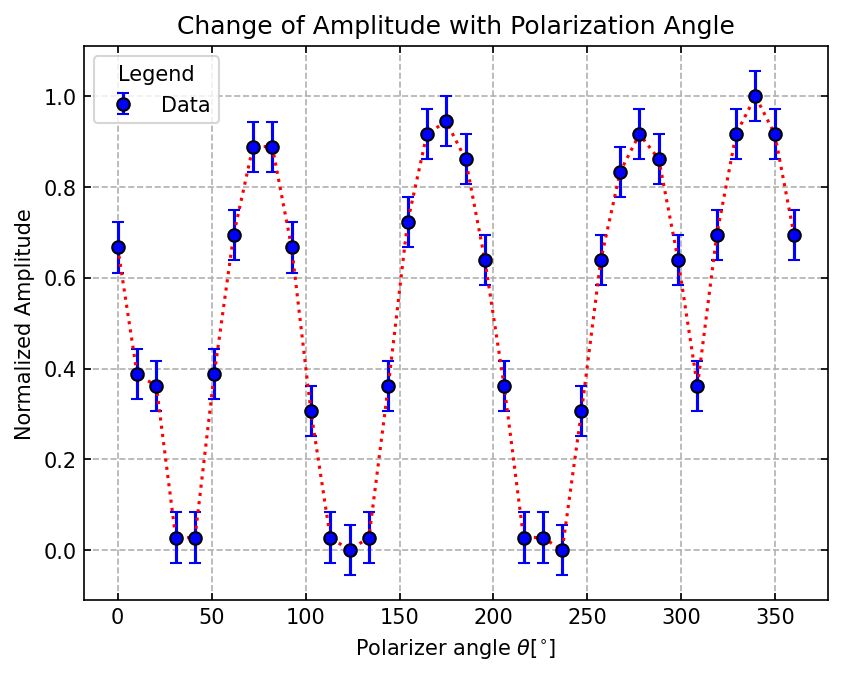

In [124]:
amplitudes = np.array([(max(v) - min(v)) for v in V1])
amp_err = [np.sqrt(1/2) * 0.078] * len(amplitudes)
amplitudes = (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min())
angles = np.linspace(0, 360, 36)
plt.errorbar(angles, (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min()), yerr = amp_err, fmt = 'o', capsize = 3, color = 'blue', label = 'Data', markeredgecolor = 'k')
plt.plot(angles, (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min()), linestyle = ':', color = 'red')
plt.grid(linestyle = '--')
plt.legend(title = 'Legend')
plt.title('Change of Amplitude with Polarization Angle')
plt.xlabel(r'Polarizer angle $\theta [^{\circ}]$')
plt.ylabel(r'Normalized Amplitude')
plt.tick_params(direction = 'in', top = True, right = True)

Text(0.5, 1.0, 'Amplitude of Laser at different Half-Plate angles')

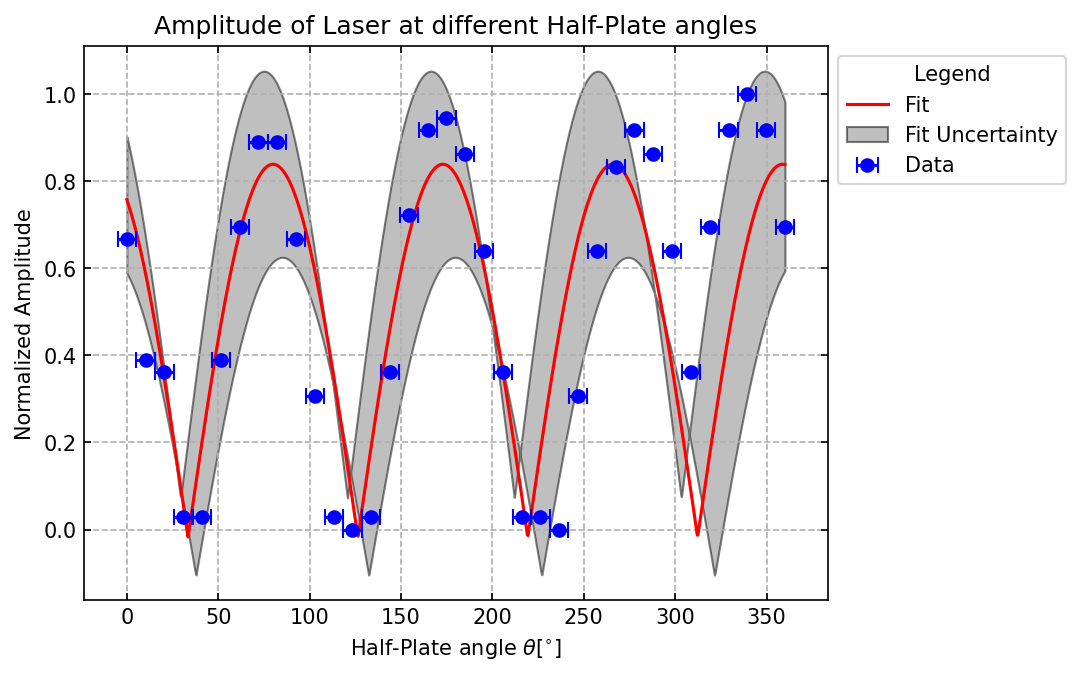

In [8]:
def amp_fit(theta, *p):
    c = p[0]
    a = p[1]
    b = p[2]
    d = p[3]
    return c * abs(np.cos(a * theta + b)) + d

p0 = [1, 0.03, 1.7, 0]

p_opt, p_cov = sc.curve_fit(amp_fit, angles, amplitudes, p0 = p0)

angles_help = np.linspace(0, 360, 1000)
paramter_err = np.sqrt(np.diag(p_cov))

plt.plot(angles_help, amp_fit(angles_help, *p_opt), color = 'red', label = 'Fit')
# plt.plot(angles_help, amp_fit(angles_help, *p0))
plt.errorbar(angles, amplitudes, xerr = 5, fmt = 'o', capsize = 4, color = 'blue', label = 'Data')
plt.fill_between(angles_help, amp_fit(angles_help, p_opt[0] + np.sqrt(p_cov[0][0]), p_opt[1] + np.sqrt(p_cov[1][1]), p_opt[2] + np.sqrt(p_cov[2][2]),
                                        p_opt[3] + np.sqrt(p_cov[3][3])), amp_fit(angles_help, p_opt[0] - np.sqrt(p_cov[0][0]), p_opt[1] - np.sqrt(p_cov[1][1]), 
                                        p_opt[2] - np.sqrt(p_cov[2][2]), p_opt[3] - np.sqrt(p_cov[3][3])), color = 'grey', edgecolor = 'k', alpha = 0.5,
                                        label = 'Fit Uncertainty')

plt.legend(title = 'Legend', bbox_to_anchor = (1, 1))
plt.grid(ls = '--')
plt.tick_params(direction = 'in', right = True, top = True)
plt.xlabel(r'Half-Plate angle $\theta [^{\circ}]$')
plt.ylabel(r'Normalized Amplitude')
plt.title('Amplitude of Laser at different Half-Plate angles')

In [24]:
peaks_half_max = np.array([  0. , 85., 160.])
peaks_half_min = np.array([ 35. ,115.])

peaks_pol_max = np.array([angles[7], angles[17], angles[27]])
peaks_pol_min = np.array([angles[3], angles[12]])

difference_max = peaks_pol_max - peaks_half_max

Text(0.5, 0, 'Angle of polarization')

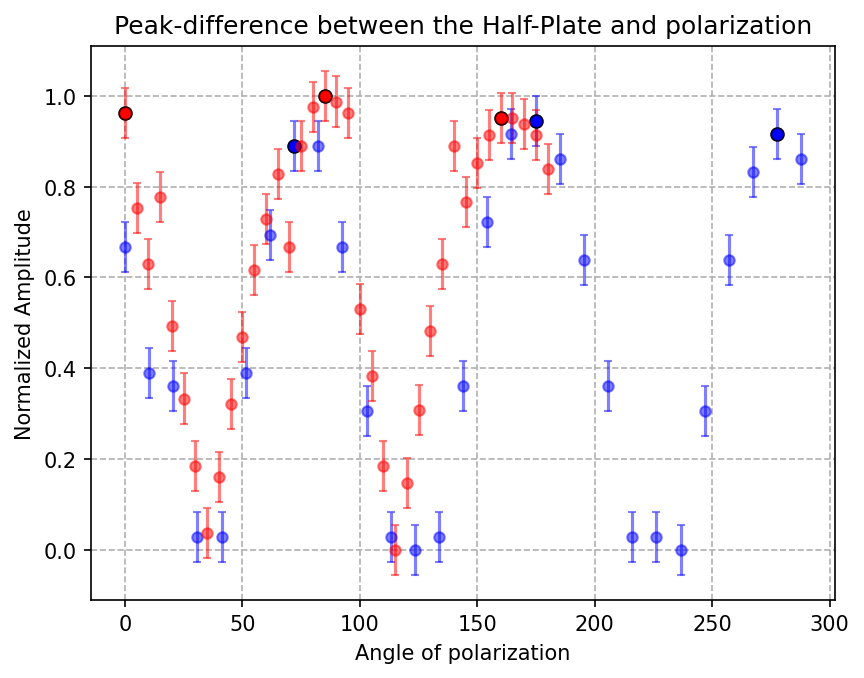

In [66]:
amps_half = np.array([0.96293902 ,1.  ,       0.95062592])
amps_pol = np.array([amplitudes[7], amplitudes[17], amplitudes[27]])

amplitudes_half = np.array([0.96293902, 0.75304797, 0.62959217, 0.77779589, 0.49382319,
                            0.33334698, 0.1851837 , 0.03702054, 0.16047634, 0.32099324,
                            0.46915639, 0.61723843, 0.72838104, 0.82717004, 0.66665327,
                            0.88885745, 0.97529264, 1.        , 0.98764633, 0.96293902,
                            0.53084373, 0.38272114, 0.18514314, 0.        , 0.14816315,
                            0.30863949, 0.48146958, 0.62963273, 0.888898  , 0.76544214,
                            0.8518369 , 0.9135648 , 0.95062592, 0.95062585, 0.93827217,
                            0.91356474, 0.83952378])

angles_half = np.array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
                    55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
                    110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
                    165., 170., 175., 180.])

plt.errorbar(angles[:29], amplitudes[:29], yerr = amp_err[0:29], fmt = 'o', color = 'blue', markersize = 5, capsize = 2, alpha = 0.5, label = 'Data Polarization')
plt.errorbar(angles_half, amplitudes_half, yerr = 0.05515432893255071, fmt = 'o', color = 'red', markersize = 5, capsize = 2, alpha = 0.5, label = 'Data Half.Plate only')
plt.plot(peaks_pol_max, amps_pol, 'o', color = 'blue', markeredgecolor = 'k')
plt.plot(peaks_half_max, amps_half, 'o', color = 'red', markeredgecolor = 'k')
plt.grid(ls = '--')
plt.title('Peak-difference between the Half-Plate and polarization')
plt.ylabel('Normalized Amplitude')
plt.xlabel('Angle of polarization')


Text(0.5, 1.0, 'Peak-difference bewteen Half-Plate and Polarization')

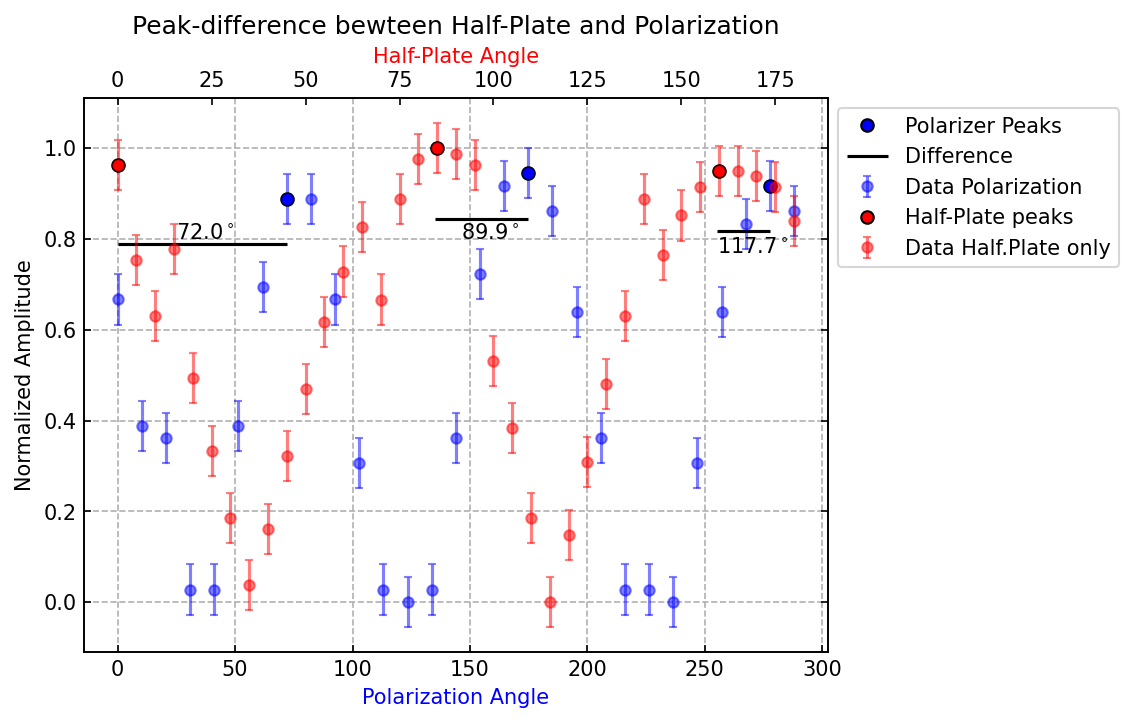

In [122]:

# Create a figure and primary axes
fig, ax1 = plt.subplots()

# Plot the first set of points on the primary x-axis
ax1.errorbar(angles[:29], amplitudes[:29], yerr = amp_err[0:29], fmt = 'o', color = 'blue', markersize = 5, capsize = 2, alpha = 0.5, label = 'Data Polarization')
ax1.plot(peaks_pol_max, amps_pol, 'o', color = 'blue', markeredgecolor = 'k', label = 'Polarizer Peaks')
ax1.set_xlabel('Polarization Angle', color = 'blue')
ax1.set_ylabel('Normalized Amplitude')

# Create a secondary x-axis at the top
ax2 = ax1.twiny()

# Plot the second set of points on the secondary x-axis
ax2.errorbar(angles_half, amplitudes_half, yerr = 0.05515432893255071, fmt = 'o', color = 'red', markersize = 5, capsize = 2, alpha = 0.5, label = 'Data Half.Plate only')
ax2.plot(peaks_half_max, amps_half, 'o', color = 'red', markeredgecolor = 'k', label = 'Half-Plate peaks')
ax2.set_xlabel('Half-Plate Angle', color = 'red')


# Adjust placement of secondary x-axis ticks to avoid overlapping with primary x-axis
ax2.tick_params(which='both', direction='in', labelbottom = False)

ax1.hlines(amps_pol[0] - 0.1, peaks_pol_max[0], peaks_half_max[0], color = 'k', label = 'Difference')
ax1.hlines(amps_pol[1] - 0.1, peaks_pol_max[1], peaks_half_max[1] + 50, color = 'k')
ax1.hlines(amps_pol[2] - 0.1, peaks_pol_max[2], peaks_half_max[2] + 95, color = 'k')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor = (1,1))
ax1.tick_params(direction = 'in', right = True)
ax1.grid(ls = '--')
ax1.text(25, 0.8, f'${difference_max[0]}^\\circ$')
ax1.text(146, 0.8, f'${round(difference_max[1], 1)}^\\circ$')
ax1.text(255, 0.77, f'${round(difference_max[2],1)}^\\circ$')


plt.title('Peak-difference bewteen Half-Plate and Polarization')

In [123]:
np.mean(difference_max)

93.19047619047619